# MapReduce as a programming model



In [8]:
def fun(x):
    return x**2

def add(x,y):
    return x+y

def maximum(x,y):
    return max(x,y)

def minimum(x,y):
    return min(x,y)

def prod(x,y):
    return x*y

def selective_division(x,y):
    return x/y if x>y else y/x 

In [2]:
L = [1,3,4,2,7]

s = 0
for a in L:
    s = s+a**2
print(s)

79


In [5]:
    
S = map(fun, L)
print(S)

[1, 9, 16, 4, 49]


In [13]:
selective_division(65, 89)

1

In [14]:
#print(L)
print(S)

print reduce(selective_division, S)

print reduce(add, map(fun, L))


print reduce(minimum, S)
#print reduce(maximum, S)

[1, 9, 16, 4, 49]
12
79
1


Number of even entries 

In [15]:
def is_even(x):
    return 1 if x%2==0 else 0

In [19]:
reduce(add, map(is_even, L))


2

In [30]:
A = ['Ahmet', 'Mehmet', 'veli'] 

def is_A(x):
    return 1 if x[0]=='A' else 0

reduce(lambda x,y: x+y, map(is_A, A))

reduce(add, A)

'AhmetMehmetveli'

# Spark

RDD : Resilient Distributed Dataset



## Load a text file on the HDFS as a RDD
* Display number of lines

In [36]:
import sys
import numpy as np

#textFile = sc.textFile("data/books-eng/hamlet.txt")
textFile = sc.textFile("data/books-eng")
textFile.count()

132646

## Get the first line

In [29]:
textFile.first()

u'Hamlet, Prince of Denmark '

## Find number of lines where a word appears

In [38]:
word = "CLAUDIUS"
textFile.filter(lambda lin: word in lin).count()

127

## Get a random sample from the file

In [52]:
textFile.sample(withReplacement=False, fraction=0.05).first()

u'Thou blushest, Antony; and that blood of thine'

In [75]:
def prnt(x):
    print x

textFile.sample(withReplacement=False, fraction=0.05).take(10)

[u'Enter an Attendant',
 u'Grates me: the sum.',
 u'',
 u"Where's Fulvia's process? Caesar's I would say? both?",
 u'When shrill-tongued Fulvia scolds. The messengers!',
 u'Fie, wrangling queen!',
 u'Enter CHARMIAN, IRAS, ALEXAS, and a Soothsayer ',
 u'this husband, which, you say, must charge his horns',
 u'with garlands!',
 u'Bring in the banquet quickly; wine enough']

## Find the line with most words

In [44]:
textFile.map(lambda line: len(line.split())).reduce(lambda a, b: a if (a > b) else b)

122

In [54]:
textFile.map(lambda line: (len(line.split()),line)).reduce(lambda a, b: a if (a[0] > b[0]) else b)

(122,
 u"    [Enter a King and a Queen very lovingly; the Queen embracing him, and he her. She kneels, and makes show of protestation unto him. He takes her up, and declines his head upon her neck: lays him down upon a bank of flowers: she, seeing him asleep, leaves him. Anon comes in a fellow, takes off his crown, kisses it, and pours poison in the King's ears, and exit. The Queen returns; finds the King dead, and makes passionate action. The Poisoner, with some two or three Mutes, comes in again, seeming to lament with her. The dead body is carried away. The Poisoner wooes the Queen with gifts: she seems loath and unwilling awhile, but in the end accepts his love]")

In [53]:
'abc df'.split()

['abc', 'df']

## Counting words

In [56]:
wordCounts = textFile.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a+b)
wordCounts.collect()

[(u'rear.', 1),
 (u'yellow', 25),
 (u'grenadier,', 1),
 (u'men?...', 1),
 (u'approchez,', 1),
 (u'mentioning.', 1),
 (u'Certains', 1),
 (u'crossbar', 1),
 (u'vanterie,', 1),
 (u'CORRIDOR', 21),
 (u'circonstances.', 1),
 (u'wood:', 2),
 (u'Ottoman.', 1),
 (u'writing.', 6),
 (u'feigned.', 1),
 (u'seven,', 2),
 (u'her!', 18),
 (u'WOOD,', 1),
 (u'Napoleon--that', 1),
 (u'atom.', 1),
 (u'chin,', 5),
 (u'colloquies', 1),
 (u'humbugged', 2),
 (u'apartments?"', 1),
 (u'rencontrerons', 1),
 (u'so...quiet.', 1),
 (u'kid!', 3),
 (u'momentary;', 1),
 (u'understood.', 8),
 (u'Poltava', 1),
 (u'admiral', 4),
 (u'kid.', 11),
 (u'insinuation', 1),
 (u'toyshop,', 1),
 (u'fervent', 1),
 (u"X-wing's", 1),
 (u'hers', 19),
 (u'undivulged', 1),
 (u'idiocy--Gossner', 1),
 (u'shriek', 4),
 (u'momie', 1),
 (u'sooner;', 1),
 (u'Stop,', 4),
 (u'sooner.', 2),
 (u'pressed,', 2),
 (u'"shelter"', 2),
 (u'remnant', 2),
 (u"CAESAR's", 13),
 (u'Indeed,', 15),
 (u'MALCOLM', 41),
 (u'cents', 1),
 (u'fingertips.', 1),
 (u

## Using the Cache
Pull a data sets into a cluster-wide in-memory cache. 

Very useful when using iterative algorithms.



In [57]:
textFile.cache()

data/books-eng MapPartitionsRDD[17] at textFile at NativeMethodAccessorImpl.java:-2

## Find words that start with an 'H' or 'h'

In [52]:
words = textFile.flatMap(lambda line: line.split())
words_subset = words.filter(lambda x: x[0] in ['H','h'])
counts = words_subset.map(lambda w: (w,1)).reduceByKey(lambda a,b: a+b)
counts.collect()

[(u'honour.', 11),
 (u'hallucination.', 1),
 (u'Han', 309),
 (u'happy!', 4),
 (u'happen--she', 1),
 (u'honour;', 1),
 (u'harmlessly', 3),
 (u'her--filled', 1),
 (u'habiliments', 1),
 (u'heath.', 1),
 (u'heiress,', 1),
 (u'heavens', 20),
 (u'herself,"', 1),
 (u'history:', 5),
 (u'happen--despite', 1),
 (u'heave.', 2),
 (u'hyssop', 1),
 (u'happy."', 4),
 (u'hotly,', 2),
 (u'him."', 31),
 (u'hopeful', 3),
 (u'happiness...', 1),
 (u'him?"', 31),
 (u'humming,', 1),
 (u'Hie', 10),
 (u'hail,', 9),
 (u'host;', 1),
 (u'humanity', 27),
 (u'horse._]', 1),
 (u'happened.', 17),
 (u'haut,', 1),
 (u'hostess.', 8),
 (u'hears.', 1),
 (u'hardships', 3),
 (u'harms.', 1),
 (u'homes', 9),
 (u'home!...', 1),
 (u'homeopaths,', 1),
 (u'hangman.', 1),
 (u'hesitated:', 2),
 (u'harlot', 1),
 (u"hang'd", 2),
 (u'house--that', 1),
 (u'hero!', 1),
 (u'howling,', 1),
 (u'hereabout:', 2),
 (u'Hurrah!', 3),
 (u'hinges', 2),
 (u'histoire.', 1),
 (u'Hercules', 2),
 (u'hereafter;', 2),
 (u'homme?', 3),
 (u'happily..."', 

### Cleanup using a regular expression

* remove all non-alphanumeric characters

In [56]:
import re

# Compile a regular expression that matches non-alphanumerics
pattern = re.compile('[\W_]+', re.UNICODE)

# Replace all non-alphanumerics with a space, then split into words
words = textFile.map(lambda line: pattern.sub(' ',line)).flatMap(lambda line: line.split())

#first_letters = set(['H','h','Q','q','s','S'])
first_letters = set(['A','a'])
# Count words that start with H
words_subset = words.filter(lambda x: x[0] in first_letters)
counts = words_subset.map(lambda w: (w,1)).reduceByKey(lambda a,b: a+b)
res = counts.collect()
for r,c in res:
    print r,c

affirme 1
alternatives 1
atomic 1
ALVAH 1
Anna 293
appealed 3
apace 8
apes 3
Archelaus 1
attirer 1
Apparition 7
assassination 2
appelez 1
add 18
ALEXAS 24
adequate 2
associations 3
accessary 1
amorous 9
adjacent 6
Arnauts 2
Architect 4
ambition 23
affect 8
annoncez 1
administer 2
Art 24
attentively 32
ascertaining 1
augmenting 1
avenged 3
architecture 1
attendre 3
adorers 1
audible 19
Accursed 2
antique 12
Adding 1
autorité 1
Army 13
arracher 3
accord 29
across 194
Accountant 2
assoupissantes 1
appear 94
Aline 2
Articulation 2
arrivance 1
appals 1
Aurora 1
astray 5
attracted 21
abides 1
Armenia 2
APPROACH 1
admiral 5
Animators 3
available 12
accordent 1
Alexey 1
abnormally 1
alone 325
article 11
Abhor 1
accident 18
Aerial 2
attacks 18
Ahh 1
against 359
agite 1
anime 1
Alsatian 2
adjutants 37
Anvil 2
appeared 128
acted 28
accorded 1
Akharovs 1
accommodate 1
apply 13
Admirable 1
assortment 1
Amen 14
aligning 1
aristocratic 3
avais 17
aperçois 1
airs 7
ANDY 1
Arranging 1
armchairs 2
Anoat

## Counting Letter bigrams



In [58]:
import re

#textFile = sc.textFile("notes/data/books-eng/hamlet.txt")
textFile = sc.textFile("data/books-eng")

# Compile a regular expression that matches non-alphanumerics
pattern = re.compile(u'[\W0-9_]+', re.UNICODE)

# Replace all non-alphanumerics with a space, then split into words
words = textFile.map(lambda line: pattern.sub(' ',line)).flatMap(lambda line: line.split())
# Convert to lower case
words = words.map(lambda w: w.lower())

# Convert to a list of letters list('abc') = ['a','b','c']
letters = words.flatMap(lambda word: [pair[0]+pair[1] for pair in zip(list('_'+word),list(word+'_')) ] )
counts = letters.map(lambda w: (w,1)).reduceByKey(lambda a,b: a+b)
bigrams = counts.collect()

In [59]:
for r,c in sorted(bigrams,key=lambda x:x[1],reverse=True):
    print r,c
    
    


e_ 172904
_t 128820
th 106824
s_ 102536
he 101810
d_ 99436
_a 97104
t_ 92419
_s 70618
_h 67740
in 66176
an 64789
n_ 63768
er 63475
_w 56231
r_ 53641
re 51571
_i 49690
_o 48646
y_ 47589
nd 47353
o_ 43783
on 40815
ou 40242
en 40018
at 39559
ha 39329
_b 38703
_m 36304
_c 35617
hi 35323
to 34885
ed 33906
is 33101
_f 32939
ng 32927
es 32406
_d 31593
it 31263
or 31073
ar 29993
g_ 28676
_p 28551
_l 28257
as 28217
st 28095
te 27913
le 27804
f_ 26620
se 26332
nt 25081
a_ 24600
me 24069
h_ 23940
l_ 23436
_n 23129
ve 22985
de 22728
of 22601
ll 22433
ro 22372
_r 21788
ea 21727
ne 21470
al 21141
_e 20797
ti 19930
ho 19908
no 19710
co 19261
ri 19213
ce 18764
m_ 18050
be 17483
om 16762
el 16694
wh 16330
ut 16321
ch 16294
_g 16157
us 15636
ot 15593
ur 15501
ma 15336
wi 15255
wa 15228
sh 15094
ad 14907
ow 14861
lo 14690
li 14339
et 14115
ra 13995
si 13900
ee 13712
ss 13601
ai 13570
il 13492
so 13230
ta 13222
ie 13145
_y 13101
un 13033
i_ 13028
la 12942
im 12930
pe 12391
fo 12378
ly 12137
rs 12107
io 11

In [129]:
bigrams[0][1]

16694

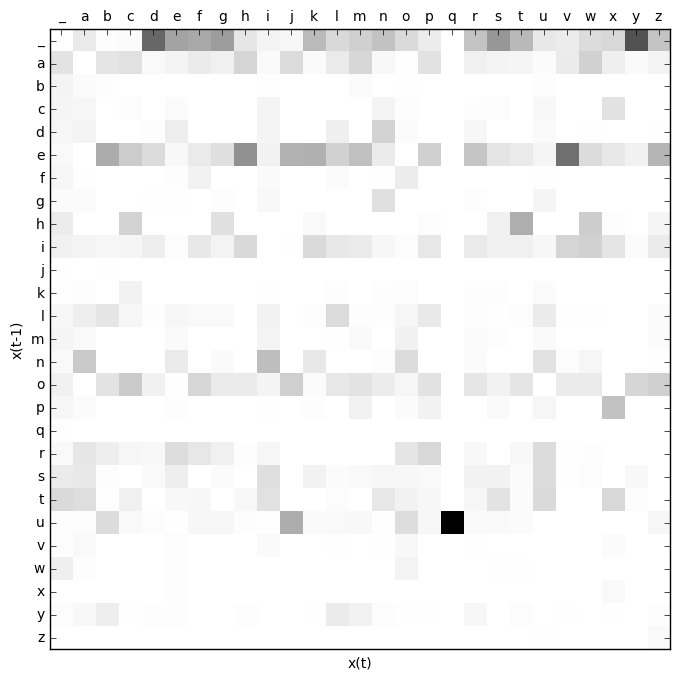

In [126]:
%matplotlib inline
import matplotlib.pylab as plt

# Reduction table
my2ascii_table = {
    ord(u'â'):"a",
    ord(u'ä'):"e",
    ord(u"à"):"a",
    ord(u"æ"):"a",
    ord(u'ç'):"c",
    ord(u"é"):"e",
    ord(u"è"):"e",
    ord(u"ê"):"e",
    ord(u"ë"):"e",
    ord(u'ğ'):"g",
    ord(u'ı'):"i",
    ord(u"î"):"i",
    ord(u'ï'):"i",
    ord(u'œ'):"o",
    ord(u"ô"):"o",
    ord(u'ö'):"o",
    ord(u'ş'):"s",
    ord(u'ù'):"u",
    ord(u"û"):"u",
    ord(u'ü'):"u",
    ord(u'ß'):"s"
    }


def letter2idx(x):
    if x=='_':
        i = 0
    else:
        i = ord(x)-ord('a')+1
    
    if i<0 or i>26:
        i = ord(my2ascii_table[ord(x)])-ord('a')+1
        
    return i

T = np.zeros((27,27))
# Convert bigrams to a transition matrix
for pair in bigrams:
    c = pair[1]
    s = list(pair[0])
    j = letter2idx(s[0])
    i = letter2idx(s[1])
    T[i,j] += c

plt.figure(figsize=(8,8))

alphabet=[chr(i+ord('a')) for i in range(26) ]
alphabet.insert(0,'_')
M = len(alphabet)

plt.imshow(T/np.sum(T,axis=0), interpolation='nearest', vmin=0,cmap='gray_r')
plt.xticks(range(M), alphabet)
plt.xlabel('x(t)')
plt.yticks(range(M), alphabet)
plt.ylabel('x(t-1)')
ax = plt.gca()
ax.xaxis.tick_top()
#ax.set_title(f, va='bottom')
plt.xlabel('x(t)')

plt.show()



## Monte Carlo with Spark

In [68]:
import numpy as np
import pyspark

def sample(p):
    x, y = 2*np.random.rand()-1, 2*np.random.rand()-1
    return 1 if x*x + y*y < 1 else 0

NUM_SAMPLES = 1000000

count = sc.parallelize(xrange(0, NUM_SAMPLES)).map(sample).reduce(lambda a, b: a + b)

print("Pi is roughly %f" % (4.0 * count / NUM_SAMPLES))

Pi is roughly 3.142848


Spark application: 
* a driver program that runs the user’s main function, that executes various parallel operations on a cluster. 

Main abstraction: 
* resilient distributed dataset (RDD), 
* a collection of elements partitioned across the nodes of the cluster that can be operated on in parallel. 

RDD: 
* Created from a file in the Hadoop file system (or any other Hadoop-supported file system)
* Automatically recover from node failures.

Cached: 
* Ask Spark to persist an RDD in memory

Shared variables: 
* broadcast variables: cache a value in memory on all nodes, 
* accumulators: counters and sums.



Spark’s Python API data formats (as of Nov 2016):

* SparkContext.wholeTextFiles:
read a directory containing of multiple small text files, return (filename, content) pairs. 

* RDD.saveAsPickleFile and SparkContext.pickleFile:
save an RDD as pickled Python objects. 

* SequenceFile and Hadoop Input/Output Formats



## Reading Json

In [69]:
from pyspark.sql import SparkSession

#    .config("spark.some.config.option", "some-value") \

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()

df = spark.read.json("data/products.json")
# Displays the content of the DataFrame to stdout
df.show()

+-------+--------------------+
|   name|          properties|
+-------+--------------------+
|Product|[[Product identif...|
+-------+--------------------+



In [70]:
#df.printSchema()
df.select("properties").show()

+--------------------+
|          properties|
+--------------------+
|[[Product identif...|
+--------------------+

